<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/ScoreDistributionSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [2]:
def plot_hists(p0, p1, ax, class_ratio, delta_mu, i, j, auc=None,
               plot_p0=True, plot_p1=True, plot_p=True):
    bins = np.linspace(0, 1, 101)
    if plot_p0:
        ax.hist(p0, 
                bins=bins, histtype='step', density=True, lw=2, alpha=0.5, color='g', label='y=0')
    if plot_p1:
        ax.hist(p1, 
                bins=bins, histtype='step', density=True, lw=2, alpha=0.5, color='r', label='y=1')
    if plot_p:
        ax.hist(np.concatenate((p0, p1)), 
                bins=bins, histtype='step', density=True, lw=2, color='k')
    ax.set_yticks([])
    if j == 0:
        ax.set_ylabel(r'$r=%s$'%str(class_ratio), rotation=0, labelpad=30)
    if i == 0:
        ax.set_title(r'$\Delta\mu=%s$'%str(delta_mu))
    ax.set_xlim(0, 1)
    if auc is not None:
        ax.annotate('AUC=%.2f'%auc, xy=(0.58, 0.85), xycoords='axes fraction')
    


def plot_calibration(p0, p1, y0, y1, ax, class_ratio, delta_mu, i, j):
    """
    """
    p = np.concatenate((p0, p1))
    y = np.concatenate((y0, y1))
    py = pd.DataFrame({'p':p, 'y':y}).sort_values('p')
    n = py.shape[0]
    k = int(n/20)
    p_pre, p_obs = [], []
    for i_ in range(0, n, k):
        py_ = py.iloc[i_:(i_+1)*k]
        p_pre.append(py_['p'].mean())
        p_obs.append(py_['y'].mean())
    ax.plot([0,1], [0,1], color='tab:grey')
    ax.scatter(p_pre, p_obs, color='tab:red')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    if j == 0:
        ax.set_ylabel(r'$r=%s$'%str(class_ratio), rotation=0, labelpad=30)
    if i == 0:
        ax.set_title(r'$\Delta\mu=%s$'%str(delta_mu))


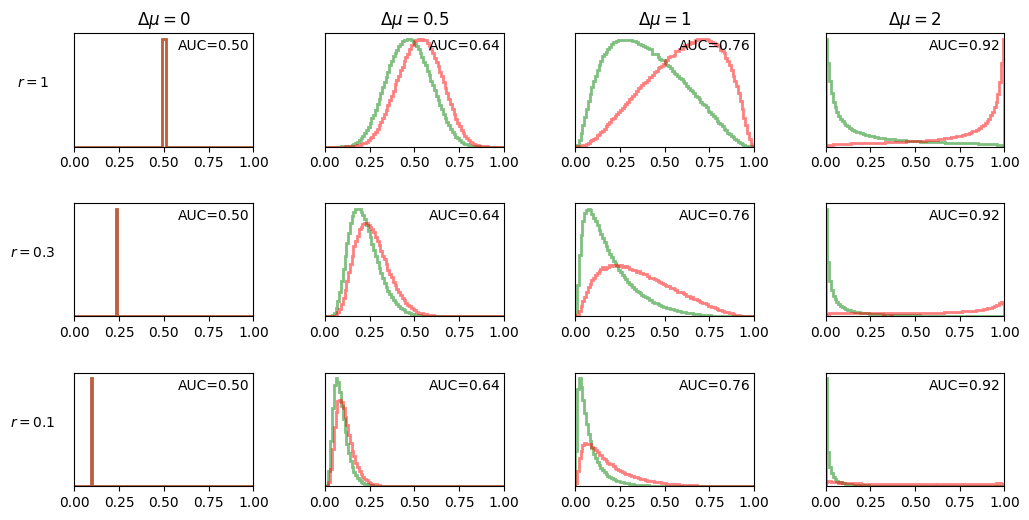

In [3]:
SEED = 42
class_ratios = [1, 0.3, 0.1]
delta_mus = [0, 0.5, 1, 2]

fig, axs = plt.subplots(figsize=(3*len(delta_mus),2*len(class_ratios)), 
                        nrows=len(class_ratios), ncols=len(delta_mus), dpi=100)

for i, class_ratio in enumerate(class_ratios):
    for j, delta_mu in enumerate(delta_mus):
        N0 = 1000000
        N1 = int(N0 * class_ratio)

        np.random.seed(SEED)
        X0 = np.random.randn(N0, 1)
        X1 = np.random.randn(N1, 1) + delta_mu
        y0 = np.zeros(N0)
        y1 = np.ones(N1)
        X = np.concatenate((X0, X1))
        y = np.concatenate((y0, y1))

        clf = LogisticRegression().fit(X, y)
        p0 = clf.predict_proba(X0)[:,1]
        p1 = clf.predict_proba(X1)[:,1]
        p = np.concatenate((p0, p1))
        auc = roc_auc_score(y, p)

        plot_hists(p0, p1, axs[i, j], class_ratio, delta_mu, i, j, auc,
                   plot_p=False)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

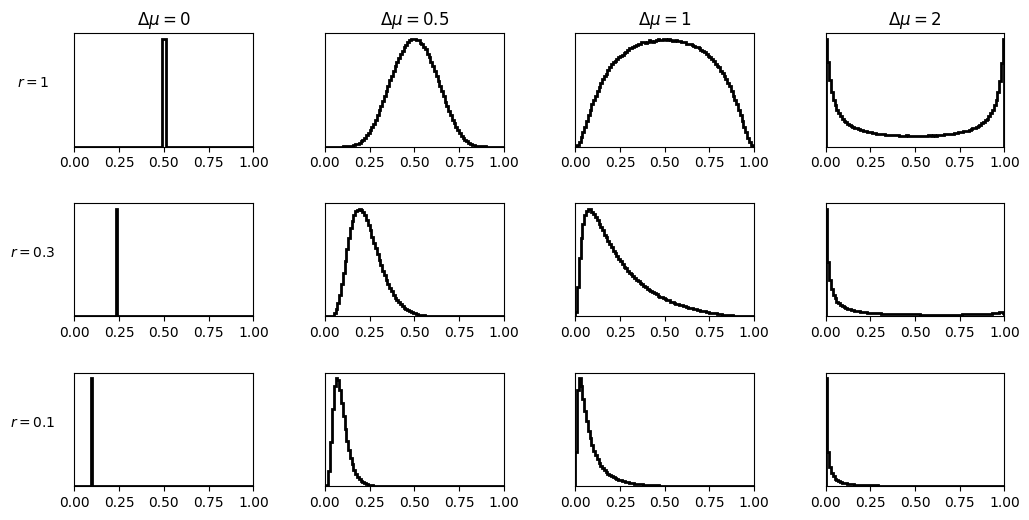

In [4]:
fig, axs = plt.subplots(figsize=(3*len(delta_mus),2*len(class_ratios)), 
                        nrows=len(class_ratios), ncols=len(delta_mus), dpi=100)

for i, class_ratio in enumerate(class_ratios):
    for j, delta_mu in enumerate(delta_mus):
        N0 = 1000000
        N1 = int(N0 * class_ratio)

        np.random.seed(SEED)
        X0 = np.random.randn(N0, 1)
        X1 = np.random.randn(N1, 1) + delta_mu
        y0 = np.zeros(N0)
        y1 = np.ones(N1)
        X = np.concatenate((X0, X1))
        y = np.concatenate((y0, y1))

        clf = LogisticRegression().fit(X, y)
        p0 = clf.predict_proba(X0)[:,1]
        p1 = clf.predict_proba(X1)[:,1]

        plot_hists(p0, p1, axs[i, j], class_ratio, delta_mu, i, j,
                   plot_p0=False, plot_p1=False)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

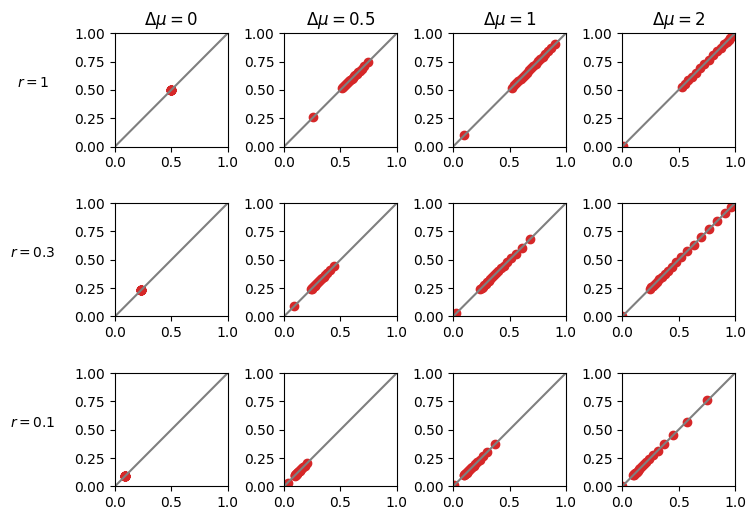

In [5]:
fig, axs = plt.subplots(figsize=(2*len(delta_mus),2*len(class_ratios)), 
                        nrows=len(class_ratios), ncols=len(delta_mus), dpi=100)

for i, class_ratio in enumerate(class_ratios):
    for j, delta_mu in enumerate(delta_mus):
        N0 = 1000000
        N1 = int(N0 * class_ratio)

        np.random.seed(SEED)
        X0 = np.random.randn(N0, 1)
        X1 = np.random.randn(N1, 1) + delta_mu
        y0 = np.zeros(N0)
        y1 = np.ones(N1)
        X = np.concatenate((X0, X1))
        y = np.concatenate((y0, y1))

        clf = LogisticRegression().fit(X, y)
        p0 = clf.predict_proba(X0)[:,1]
        p1 = clf.predict_proba(X1)[:,1]

        plot_calibration(p0, p1, y0, y1, axs[i,j], class_ratio, delta_mu, i, j)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
